# Ex1 Use data from Danmarks Statistik - Databanken
### With data aggregation and data visualization answer the following questions:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_api_data_to_csv(url):
    return pd.read_csv(url, delimiter=';')


,CIVILSTAND,TID,INDHOLD,PROCENT
0,Fraskilt,2008K1,428864,0.000000
10,Fraskilt,2010K3,446333,0.003525
20,Fraskilt,2013K1,468891,0.005436
30,Fraskilt,2015K3,509922,0.006516
40,Fraskilt,2018K1,537834,0.004599


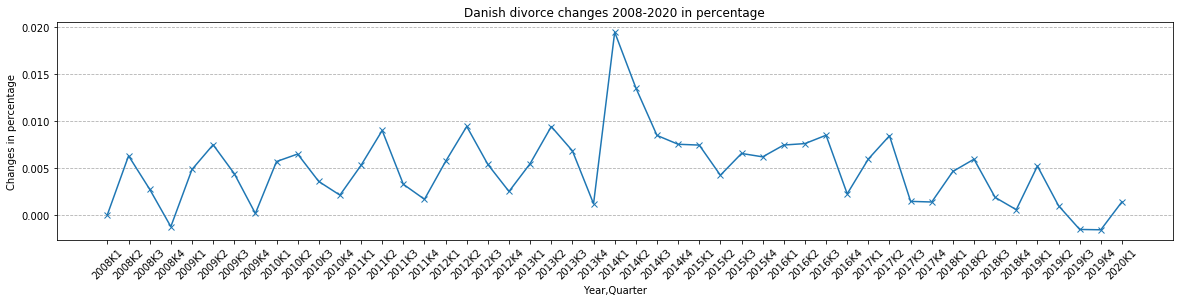

In [79]:
#What is the change in pct of divorced danes from 2008 to 2020?

#get all data(2008-2020, divorcees)
ex1_df = get_api_data_to_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=*')
#add percentage ranges
ex1_df['PROCENT'] = ex1_df['INDHOLD'].astype(float).pct_change().fillna(0) 

#chart
plt.figure(figsize=(20,4))
plt.xlabel('Year,Quarter')
plt.ylabel('Changes in percentage')
plt.title('Danish divorce changes 2008-2020 in percentage')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.plot(ex1_df['TID'],ex1_df['PROCENT'], marker='x')
ex1_df[::10]

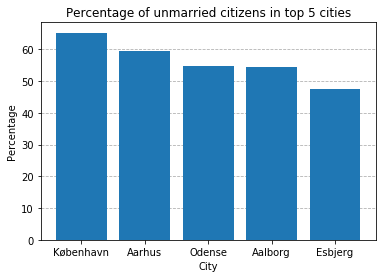

[65.23579087199924, 59.576893734838556, 54.90129090509773, 54.448462512956354, 47.63818051141727]


In [3]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married'?
#5 biggest cities = København, Aarhus, Odense, Aalborg, Esbjerg
#codes = 101,751,461,851,561

#get 2020 data from top 5 cities, include total & unmarried
ex2_df = get_api_data_to_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101%2C751%2C461%2C851%2C561&CIVILSTAND=TOT&CIVILSTAND=U')
#ex2_df
#ex2_df['PERCENTAGE'] = ex2_df.apply(lambda x: f(x.col_1, x.col_2), axis=1) #https://stackoverflow.com/a/52854800
def get_percentage(low, high):
    #actual_high = high-low #high is total, e.g. including unmarried
    return (low/high)*100
total = ex2_df[ex2_df['CIVILSTAND'] == 'I alt']
unmarried = ex2_df[ex2_df['CIVILSTAND'] == 'Ugift']
ex2_result = [get_percentage(x, y) for x, y in zip(unmarried['INDHOLD'], total['INDHOLD'])] #https://stackoverflow.com/a/55557758

#set up chart
plt.figure()
plt.title('Percentage of unmarried citizens in top 5 cities')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', zorder=0)
plt.bar(ex2_df['OMRÅDE'][::2], ex2_result, zorder=3)
plt.show()
print(ex2_result, sep='\t')

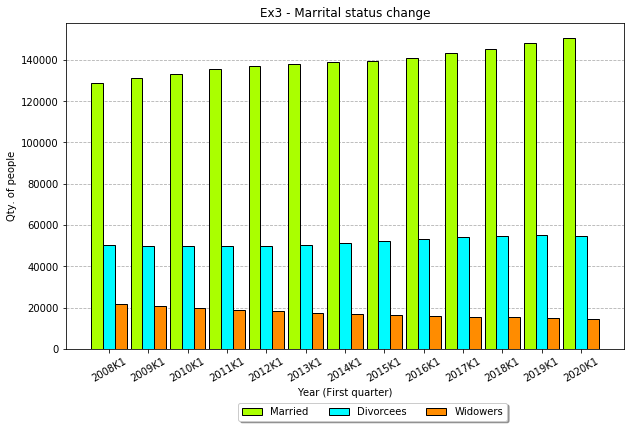

In [106]:
import numpy as np
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
ex3_df = get_api_data_to_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G%2CE%2CF&Tid=*')

#get relevant data from 1 datapoint per year (K1)
married = ex3_df[(ex3_df['CIVILSTAND'] == 'Gift/separeret') & (ex3_df['TID'].str.contains('K1'))] #contains married data of K1 '08-'20
widowers = ex3_df[(ex3_df['CIVILSTAND'] == 'Enke/enkemand') & (ex3_df['TID'].str.contains('K1'))] #contains "widowees" data of K1 '08-'20
divorcees = ex3_df[(ex3_df['CIVILSTAND'] == 'Fraskilt') & (ex3_df['TID'].str.contains('K1'))] #contains divorcees data of K1 '08-'20

#prepare chart
plt.figure(figsize=[10,6])
ypos = np.arange(len(married['TID']))
#bars
plt.bar(ypos-0.3, married['INDHOLD'], width=0.3, color="#aaff00", label="Married", ec="black", zorder=3)
plt.bar(ypos, divorcees['INDHOLD'], width=0.3, color="#00fbff", label="Divorcees", ec="black", zorder=3)
plt.bar(ypos+0.3, widowers['INDHOLD'], width=0.3, color="#ff8c00", label="Widowers", ec="black", zorder=3)

#labels, misc
plt.xlabel('Year (First quarter)')
plt.ylabel('Qty. of people')
plt.title('Ex3 - Marrital status change')
plt.xticks(ypos, married['TID'], rotation=30)
plt.legend(loc='upper left',bbox_to_anchor=(0.3, -0.15), shadow=True, ncol=3)
plt.grid(axis='y', linestyle='--', zorder=0)

#bars old
#for frame in [married, widowers, divorcees]:
    #frame.set_index('')
    #plt.bar(frame['TID'],frame['INDHOLD'])
plt.show()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


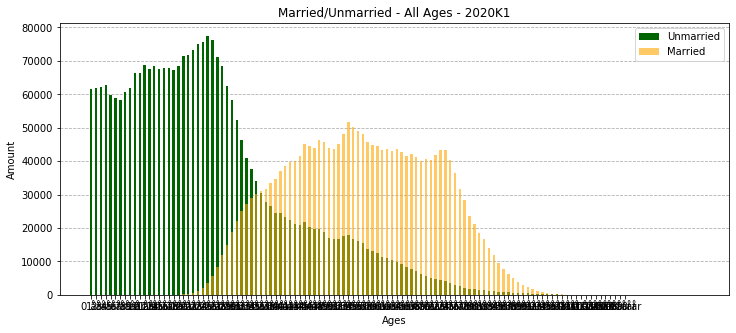

In [265]:
#Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
#all ages, married/unmarried, current year k1

ex4_df = get_api_data_to_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&ALDER=*');
ex4_df

married = ex4_df[ex4_df['CIVILSTAND'] == 'Gift/separeret'][1:] #remove total
unmarried = ex4_df[ex4_df['CIVILSTAND'] == 'Ugift'][1:] #remove total

plt.figure(figsize=[12,5])
p1 = plt.bar(unmarried['ALDER'], unmarried['INDHOLD'], width=0.5, linewidth=0, align='center', color='darkgreen', label="Unmarried", zorder=3) 
#, bottom=married['INDHOLD'].tolist()
p2 = plt.bar(married['ALDER'], married['INDHOLD'], width=0.5, linewidth=0, align='center',color='orange', label="Married", alpha=0.6, zorder=3) 
#plt.axis(xmin=0)
#plt.axis([0, 110, 0, max(unmarried['INDHOLD'])+7500]) #x-axis data ends at 107
plt.title('Married/Unmarried - All Ages - 2020K1', fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.grid(axis='y', linestyle='--', zorder=0)
#custom_xticks = [married['ALDER'][index][:-3] for index in married.index] #remove ' år' from data
#print(custom_xticks)
ypos = np.arange(len(range(111))) #len(married['ALDER'])
print(ypos)
custom_xticks = list(ypos)
print(custom_xticks)
#plt.xticks(ypos, married['TID'], rotation=30)
###plt.xticks(ypos[::5],custom_xticks[::5], rotation=45)
#plt.tick_params(axis='x', which='minor', labelsize=10, pad=15)
#plt.margins(10,15)
# plt.subplots_adjust(wspace=1)
ax = plt.gca()
#ax.tick_params(axis='x',width=0.5, labelsize='small', colors='r')
#plt.locator_params(axis='x', nbins=5, steps=5, min_n_ticks=4)
# ax.set_xticks()
###ax.xaxis.set_ticks(plt.xticks()[::5])
plt.xticks(np.arange(0,111, 1.0))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 5))
#ax.xaxis.set_ticks(np.arange(0, 110, 1))
#ax.locator_params(nbins=10, axis='x')
#bottom= tels the bar to lay on top of the other dataset.
plt.legend()
plt.show()